
# What is learning?

ANN learning is about error attribution: if we can identify and quantify errors, then we can reduce errors. The end result is we (or network) learned. The way we identify errors is mostly **compare** - by comparing prediction output with labels.


## How do we measure error?

one way is "mean error square":

```
goal_pred = 0.2
pred = 0.3
error = (pred - goal_pred) ** 2
```

There are two points to note here:
* If we define our goal is to make error = 0. Think of this scenario: the first input give error of +1, second input give error of -1, and your average error = 0. That is *not* what we want. Therefore, the error is always positive, negative error doesn't make sense. it makes sure of it by squaring it. 
* It amplifies bigger error, and reduce smaller error, which is okay. It could be the properties that we actually want.





We need to learn 3 things:

1. Neuron
2. How Neuron connects to make forward propgation
3. How back propagation works


## Neuron

<img src="../figs/neuron.png" width="640">

what is happening?

* Each input is multiplifed by a weight, add up, then add another value called bias.
* This "weighted input" is passed on to "activation function", $f$
* Why $f$? we want to constrain the output value to a certain range.




## Activation function: sigmoid

$$f(x) = \frac{1}{1 + e^{-x}}$$

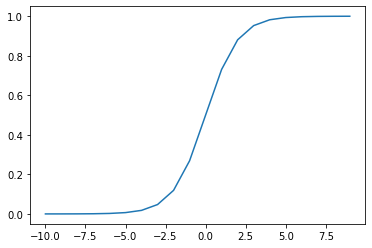

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.arange(-10,10)
plt.plot(x, sigmoid(x))


## Coding Neuron: feedforward

Assume $w_1 = 0.2$, $w_2=0.8$ , $b = 5$, neuron input $x_1 = 3$, $x_2=5$ then: 
\begin{align}
w \cdot x + b &= (w_1 * x_1) + (w_2 * x_2) + b \\
                &= 0.2 * 3 + 0.8 * 5 + 5 \\
                &= 9.6
\end{align}


Now, activation function:

$$ f(9.6) = 0.9999322758503804 $$

In [21]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        output = np.dot(self.weights, inputs) + self.bias
        return sigmoid(output)

weights = np.array([0.2,0.8])
bias = 5
n = Neuron(weights, bias)
x = np.array([3,5])
n.feedforward(x)

0.9999322758503804

# Build Network with Neurons

Here we show a neural network built with 3 neurons.

<img src="../figs/3neurons.png" width="640">




In [23]:
weights = np.array([0.2,0.8])
bias = 0
n = Neuron(weights, bias)
x = np.array([3,5])
n.feedforward(x)

0.9900481981330957

In [24]:
weights = np.array([0.2,0.8])
bias = 0
n3= Neuron(weights, bias)
x = np.array([0.99,0.99])
n3.feedforward(x)

0.7290879223493065

## ANN Network
Above code, we manually recycled previous definition of single neuron.
we can also code it up as a network


In [27]:
class ANN3:
    '''
    A neuron network with 3 neurons
    2 input
    a hidden layer with 2 neurons
    a output layer with 1 neurons
    each neuron has w as 0.2, 0.8
    bias 0
    '''
    def __init__(self):
        weights = np.array([0.2, 0.8])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        # the inputs to o1 are outputs from h1 and h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = ANN3()
x = np.array([3,5])
network.feedforward(x)

0.7290974422779296

# Learning and Loss Function



## The meaning of learning

Let's say we want to use the above network to do something useful.
$x_1$ denotes the input of *weight*, $x_2$ denotes the input of *height*, we have a dataset that tabulate:
```
Name    Weight     Height     Gender
Alice   -2         -1           1
Bob      25         6           0
Charlie  17         4           0 
Diana    -15        -6          1
```
And we like to use above network to predict that given weight and height, what is the gender?

The only parameters we can control is weight: the path way to figure out what weights to use is the process of **learning**.




## The goal of learning

To drive this learning process, we need to define a loss function. 

The goal to have this loss function is to minimize it until no more room (optimal).




## MSE: Mean Squared Error

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}} - y_{\text{pred}})^2$$

* $n$ is the total number of observations
* $y_{\text{pred}}$: predicted outcome
* $y_{\text{true}}$: ground truth

Better prediction means lower loss;

Training network means find out a set of weights that can minimize the loss


In [2]:
import numpy as np
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length
    return ((y_true - y_pred)** 2).mean()

y_true = np.array([1,0,0,1])
y_pred = np.array([0,0,0,0])
mse_loss(y_true, y_pred)

0.5

# Gradient Descent

GD is the systematic way of minimizing loss.

![](figs/3neurons2.png)

In this case, the loss function is a multivariate function:

$$L(w_1, w_2, w_3, w_4, w_5, b_1, b_2, b_3)$$


The question is: how would $L$ change if we want to change $w_1$? This is a question can be answered by partial derivative: $$\frac{\partial L}{\partial w_1}$$.


Assume we have ONE sample in the dataset:

```
Name    Weight     Height     Gender
Alice   -2         -1           1
```


Then
\begin{align}
\rm{MSE} &= \frac{1}{1} \sum_{i=1}^1(y_{\rm{true}} - y_{\rm{pred}})^2 \\
         &= (y_{\rm{true}} - y_{\rm{pred}})^2 \\
         &= (1 - y_{\rm{pred}})^2
\end{align}

We can compute $\frac{\partial L}{\partial y_{\rm pred}}$ as:

$$ \frac{\partial L}{\partial y_{pred}} = \frac{\partial (1-y_{pred})^2}{\partial y_{pred}} = -2(1-y_{pred}) $$


We now figure out: $\frac{\partial y_{pred}}{\partial w_1}$:

We use $h_1, h_2, o_1$ be the outputs of the neurons they represent. So in this case:

$$y_{pred} = o_1 = f(w_5 h_1 + w_6 h_2 + b_3)$$

Since $w_1$ only affects $h_1$ (not $h_2$), then:

$$\frac{\partial y_{pred}}{\partial w_1} = \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}$$

And 

$$\frac{\partial y_{pred}}{\partial h_1} = w_5 * f'(w_5 h_1 + w_6 h_2 + b_3)$$

We also know:

$$ h_1 = f(w_1 x_1 + w_2 x_2 + b_1)$$

Therefore:

$$\frac{\partial h_1}{\partial w_1} = x_1 * f'(w_1 x_1 + w_2 x_2 + b_1)$$

And, $x_1$ is weight, $x_2$ is height. 

$$ f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = f(x) * (1 - f(x))$$


Finally, we come back to the earlier question: how does $L$ changes when $w_1$ changes?

$$ \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial w_1}$$

We have calculated both terms (to the degree that this can be calcuated). 


![](figs/manual_derive.png)

We can initialize all weights to be 1 and all bias to be 0, then manually calulate:

$$h_1 = 0.0474, h_2 = 0.524$$

\begin{align}
\frac{\partial L}{\partial y_{pred}} &= -2(1-y_{pred}) = -0.952 \\
\frac{\partial y_{pred}}{\partial h_1} &= w_5 * f'(w_5 h_1 + w_6 h_2 + b_3) = 0.249$$ \\
\frac{\partial h_1}{\partial w_1} &= x_1 * f'(w_1 x_1 + w_2 x_2 + b_1) = -0.0904 \\
\frac{\partial L}{\partial w_1} &= 0.0214 
\end{align}

# Training: Stochastic Gradient Descent

SGD tells us how to update weights and bias to minimize loss. To update:

$$ w_1 \leftarrow w_1 - \eta \frac{\partial L}{\partial w_1}$$

$\eta$ is famously known as the learning rate.

The update formula says:

* If $\frac{\partial L}{\partial w_1}$ is positive, then $w_1$ will decrease, which make $L$ descrease.
*  If $\frac{\partial L}{\partial w_1}$ is negative, then $w_1$ will increase, which make $L$ descrease

## training process

1. Choose one sample from dataset, that is what "stochastic" means.
2. Calcualte all partial derivative of loss with respect to weights or bias
3. Use update equation to update EACH weight and bias
4. Go back to step 1.


## Code it up (version 0)

Emily: 0.967
Frank: 0.057


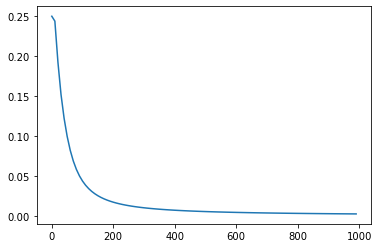

In [57]:
# %load ann3_ver0.py
#%%
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length
    return ((y_true - y_pred)** 2).mean()

class ANN3:
    '''
    2 inputs, a hidden layer, a output layer, see above graph for details
    '''
    def __init__(self):
        # self.w1, self.w2, self.w3,self.w4,self.w5,self.w6 = np.random.randn(6)
        # self.b1, self.b2, self.b3 = np.random.randn(3)
        self.w1, self.w2, self.w3,self.w4,self.w5,self.w6 = np.repeat(0,6)
        self.b1, self.b2, self.b3 = np.repeat(0, 3)
        self.losses = []
        self.epochs = []

    def feedforward(self,x):
        # x is 2-element array
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, y_trues):
        '''
        data is (nx2) array, n is number of samples, two element is weight and height
        y_trues is the corresponding ground truth for each sample
        '''
        lr = 0.1 # learning rate
        epoches = 1000 # number of times to loop through the entire dataset
        for epoch in range(epoches):
            for x, y_true in zip(data, y_trues):
                
                # -----
                # do feedforward
                # -----
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                
                y_pred = o1
                
                # -----
                # do paritial derivative
                # naming: d_L_d_w1 represents "partial L / partial w1"
                # -----
                
                d_L_d_ypred = -2 * (y_true - y_pred)
                
                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
                
                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
                
                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                
                # ------
                # update weights and bias
                # ------
            
                # Neuron h1
                self.w1 -= lr * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= lr * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= lr * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                # Neuron h2
                self.w3 -= lr * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= lr * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= lr * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
                # Neuron o1
                self.w5 -= lr * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= lr * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= lr * d_L_d_ypred * d_ypred_d_b3
                
            # --- calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(y_trues, y_preds)
                # print("Epoch %d loss: %.3f" % (epoch, loss))
                self.losses.append(loss)
                self.epochs.append(epoch)

# define dataset

data = np.array([
    [-2, -1], # Alice
    [25,6], # Bob
    [17, 4], # Charlie
    [-15, -6], # Diana
])
y_trues = np.array([
    1, # alice
    0, # bob
    0, # charlie
    1, # diana
])

# Training our NN
network = ANN3()
network.train(data, y_trues)

# Make some predictions
emily = np.array([-7, -3])  # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches

print("Emily: %.3f" % network.feedforward(emily))
print("Frank: %.3f" % network.feedforward(frank))

plt.plot(network.epochs, network.losses)


# References

1. https://victorzhou.com/blog/intro-to-neural-networks/
2. 
